In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
df = df.dropna(subset=['Latitude', 'Longitude'])

# --- Fill missing values for:
# Location Description: fill with "unknown"
df['Location Description'] = df['Location Description'].fillna('unknown')


<ipython-input-5-a9ec114ceb74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location Description'] = df['Location Description'].fillna('unknown')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419631 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1419631 non-null  int64  
 1   ID                    1419631 non-null  int64  
 2   Case Number           1419631 non-null  object 
 3   Date                  1419631 non-null  object 
 4   Block                 1419631 non-null  object 
 5   IUCR                  1419631 non-null  object 
 6   Primary Type          1419631 non-null  object 
 7   Description           1419631 non-null  object 
 8   Location Description  1419631 non-null  object 
 9   Arrest                1419631 non-null  bool   
 10  Domestic              1419631 non-null  bool   
 11  Beat                  1419631 non-null  int64  
 12  District              1419630 non-null  float64
 13  Ward                  1419617 non-null  float64
 14  Community Area        1419606 non-null 

In [7]:
df['District'] = df['District'].fillna(df['District'].mode()[0])
df['Ward'] = df['Ward'].fillna(df['Ward'].mode()[0])
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419631 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1419631 non-null  int64  
 1   ID                    1419631 non-null  int64  
 2   Case Number           1419631 non-null  object 
 3   Date                  1419631 non-null  object 
 4   Block                 1419631 non-null  object 
 5   IUCR                  1419631 non-null  object 
 6   Primary Type          1419631 non-null  object 
 7   Description           1419631 non-null  object 
 8   Location Description  1419631 non-null  object 
 9   Arrest                1419631 non-null  bool   
 10  Domestic              1419631 non-null  bool   
 11  Beat                  1419631 non-null  int64  
 12  District              1419631 non-null  float64
 13  Ward                  1419631 non-null  float64
 14  Community Area        1419631 non-null 

In [9]:
columns_to_drop = ['Case Number', 'IUCR', 'FBI Code', 'Unnamed: 0']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Final shape after cleaning:", df.shape)

Final shape after cleaning: (1419631, 19)


In [10]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=0a9e6958a48dba3c95fd19a6a111d0a245cb163bd5bfb33464bbb251d024e392
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [11]:
import pandas as pd
import numpy as np

df['stratify_key'] = df['Primary Type'] + '_' + df['Location Description']

group_counts = df['stratify_key'].value_counts()
valid_groups = group_counts[group_counts >= 2].index
df_filtered = df[df['stratify_key'].isin(valid_groups)]

total_needed = 10000
group_proportions = df_filtered['stratify_key'].value_counts(normalize=True)
sample_sizes = (group_proportions * total_needed).round().astype(int)

diff = sample_sizes.sum() - total_needed
if diff != 0:
    largest_group = sample_sizes.idxmax()
    sample_sizes[largest_group] -= diff

# Perform stratified sampling
stratified_sample = pd.concat([
    df_filtered[df_filtered['stratify_key'] == k].sample(n=v, random_state=42)
    for k, v in sample_sizes.items()
])

print(f"Final sample size: {len(stratified_sample)}")
df_stratified = stratified_sample.sample(frac=1, random_state=42).reset_index(drop=True)
df_stratified.drop(columns=['stratify_key'], inplace=True, errors='ignore')


Final sample size: 10000


In [12]:
import pandas as pd
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_stratified['Date'] = pd.to_datetime(df_stratified['Date'])
df_stratified['Days'] = (df_stratified['Date'] - df_stratified['Date'].min()).dt.days

<ipython-input-12-7412d63d634c>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stratified['Date'] = pd.to_datetime(df_stratified['Date'])


In [23]:
df_stratified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    10000 non-null  int64         
 1   Date                  10000 non-null  datetime64[ns]
 2   Block                 10000 non-null  object        
 3   Primary Type          10000 non-null  object        
 4   Description           10000 non-null  object        
 5   Location Description  10000 non-null  object        
 6   Arrest                10000 non-null  bool          
 7   Domestic              10000 non-null  bool          
 8   Beat                  10000 non-null  int64         
 9   District              10000 non-null  float64       
 10  Ward                  10000 non-null  float64       
 11  Community Area        10000 non-null  float64       
 12  X Coordinate          10000 non-null  float64       
 13  Y Coordinate     

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse import csr_matrix

df_stratified['Date'] = pd.to_datetime(df_stratified['Date'])

spatial_coords = df_stratified[['Latitude', 'Longitude']].values

In [25]:
# Define spatial threshold in degrees (approx. 500 meters)
spatial_threshold = 0.005

nbrs = NearestNeighbors(radius=spatial_threshold, algorithm='ball_tree').fit(spatial_coords)
adj_matrix = nbrs.radius_neighbors_graph(spatial_coords, mode='connectivity')

G = nx.from_scipy_sparse_array(adj_matrix)

In [26]:
temporal_threshold = 30  # days

# Remove edges between nodes that aren't close in time
edges_to_remove = []
for u, v in G.edges():
    date_u = df_stratified.iloc[u]['Date']
    date_v = df_stratified.iloc[v]['Date']
    days_diff = abs((date_u - date_v).days)

    if days_diff > temporal_threshold:
        edges_to_remove.append((u, v))

G.remove_edges_from(edges_to_remove)

In [27]:
#Clique Detection
min_clique_size = 3
cliques = list(nx.find_cliques(G))
large_cliques = [clique for clique in cliques if len(clique) >= min_clique_size]

print(f"Found {len(large_cliques)} cliques of size >= {min_clique_size}")

Found 610 cliques of size >= 3


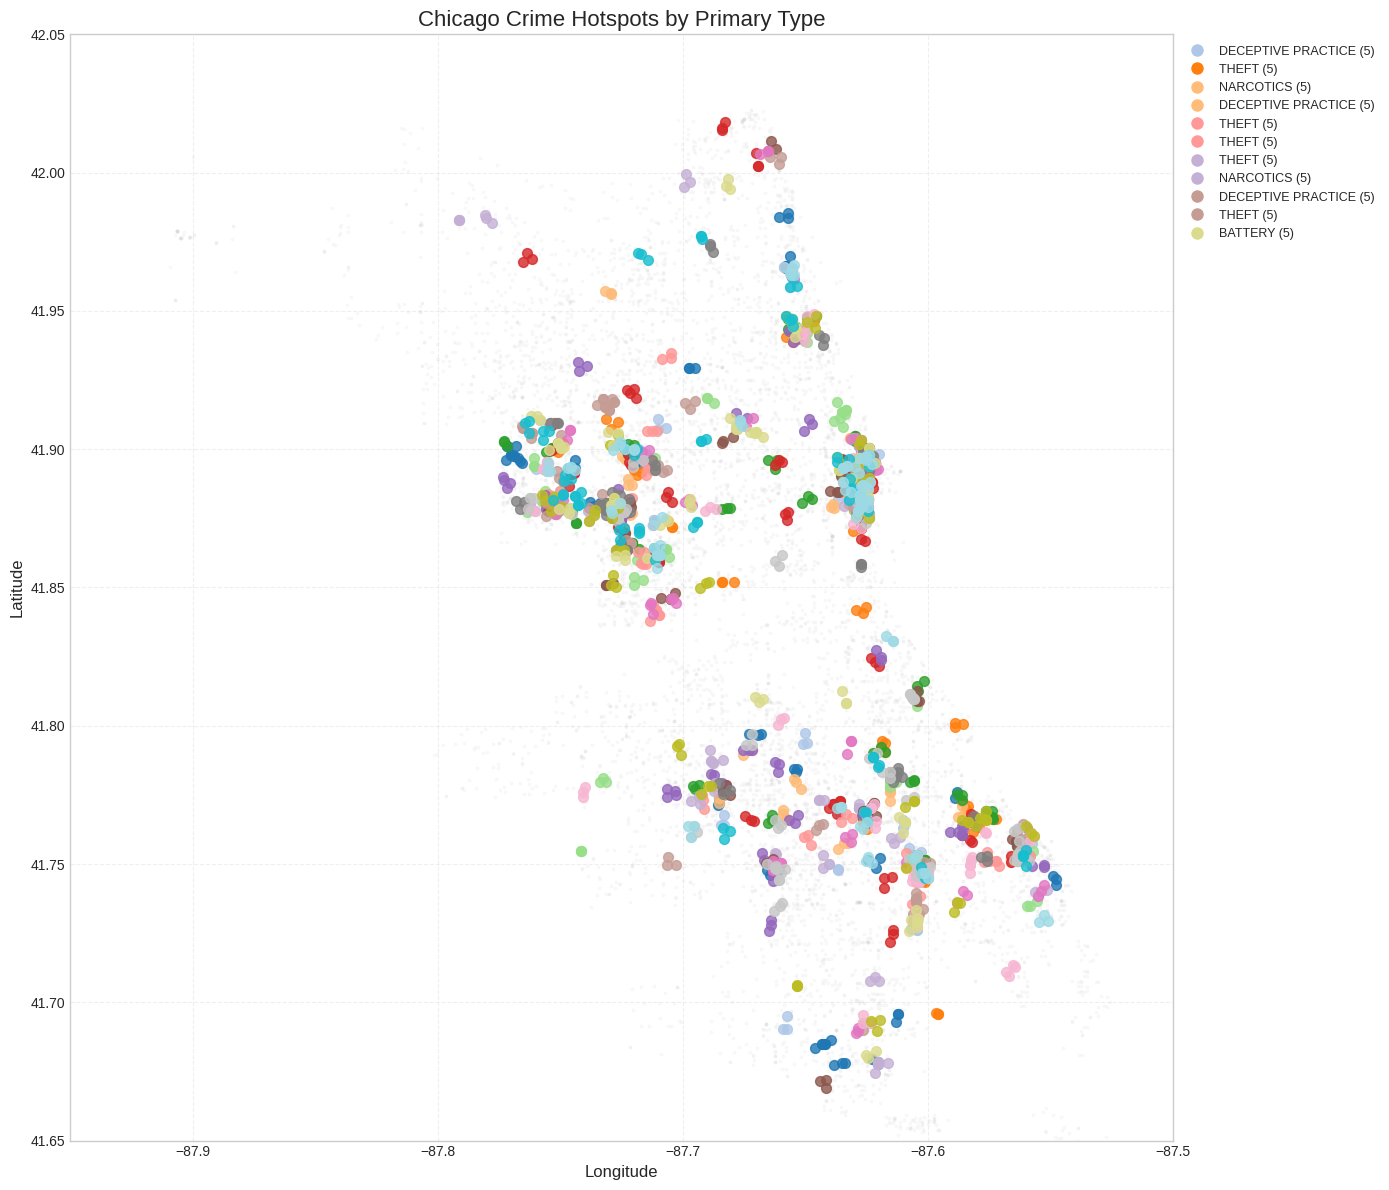

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

plt.figure(figsize=(14, 12))

plt.scatter(df_stratified['Longitude'], df_stratified['Latitude'],
            c='lightgray', alpha=0.1, s=3, label='All Crimes')

# 2. Ensure you're using the correct Chicago coordinates
plt.xlim(-87.95, -87.5)
plt.ylim(41.65, 42.05)

colors = plt.cm.tab20(np.linspace(0, 1, len(large_cliques)))

legend_elements = []

for i, clique in enumerate(large_cliques):
    clique_data = df_stratified.iloc[clique]

    crime_counts = Counter(clique_data['Primary Type'])
    top_crime = crime_counts.most_common(1)[0][0]

    plt.scatter(clique_data['Longitude'], clique_data['Latitude'],
                color=colors[i], alpha=0.8, s=50,
                label=f"{top_crime} ({len(clique)})")

    if len(clique) >= 5:  # Adjust threshold as needed
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=colors[i], markersize=10,
                             label=f"{top_crime} ({len(clique)})"))

plt.title('Chicago Crime Hotspots by Primary Type', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(handles=legend_elements, loc='upper left',
           bbox_to_anchor=(1, 1), fontsize=9)

plt.tight_layout()
plt.show()

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

cluster_labels = np.full(len(df_stratified), -1)  # -1 indicates noise/unclustered
for i, clique in enumerate(large_cliques):
    for node in clique:
        if cluster_labels[node] == -1:
            cluster_labels[node] = i

df_stratified['Days'] = (pd.to_datetime(df_stratified['Date'])
                         - pd.to_datetime(df_stratified['Date'].min())).dt.days

features = df_stratified[['Latitude', 'Longitude', 'Days']].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

mask = cluster_labels != -1
X = features_scaled[mask]
labels = cluster_labels[mask]

if len(np.unique(labels)) > 1:
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Not enough clusters to compute silhouette score (need at least 2)")


Silhouette Score: 0.446


Join-Less Approach for Co-Location Pattern Mining (Jin Soung Yoo, Shashi Shekhar, Mete Celik Computer Science Department, University of Minnesota, Minn)

In [34]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt

df = df_stratified.copy()

In [35]:
crime_codes = {ctype: idx for idx, ctype in enumerate(df['Primary Type'].unique())}
df['crime_code'] = df['Primary Type'].map(crime_codes)

# Spatial threshold (500 meters ≈ 0.005 degrees in Chicago)
spatial_threshold = 0.005
min_prevalence = 0.3  # Minimum participation index threshold

In [36]:
#Build Neighborhood Graph
coords = df[['Latitude', 'Longitude']].values
nbrs = NearestNeighbors(radius=spatial_threshold).fit(coords)
adj_matrix = nbrs.radius_neighbors_graph(coords, mode='connectivity')

In [37]:
# Generate Star Neighborhoods
star_neighborhoods = []
for i in range(len(df)):
    neighbors = adj_matrix[i].nonzero()[1]
    star_nbrs = [j for j in neighbors if df.iloc[j]['crime_code'] > df.iloc[i]['crime_code']]
    if len(star_nbrs) > 0:
        star_neighborhoods.append((i, star_nbrs))

In [38]:
#Co-location Pattern Mining
def generate_candidates(prev_level, k):
    candidates = set()
    for p1 in prev_level:
        for p2 in prev_level:
            if p1[:-1] == p2[:-1]:
                new_candidate = tuple(sorted(p1 + (p2[-1],)))
                if all(combo in prev_level for combo in combinations(new_candidate, k-1)):
                    candidates.add(new_candidate)
    return candidates

In [39]:
prevalence = defaultdict(float)
participation_counts = defaultdict(lambda: defaultdict(set))

# First level (size=2 patterns)
for center, neighbors in star_neighborhoods:
    center_type = df.iloc[center]['crime_code']
    for nbr in neighbors:
        nbr_type = df.iloc[nbr]['crime_code']
        pattern = tuple(sorted((center_type, nbr_type)))
        participation_counts[pattern][center_type].add(center)
        participation_counts[pattern][nbr_type].add(nbr)

# Calculate participation index for size=2
size2_patterns = {}
for pattern in participation_counts:
    pr = []
    for feature in pattern:
        total = (df['crime_code'] == feature).sum()
        participating = len(participation_counts[pattern][feature])
        pr.append(participating / total)
    pi = min(pr)
    if pi >= min_prevalence:
        size2_patterns[pattern] = pi
        prevalence[pattern] = pi

k = 3
current_level = set(size2_patterns.keys())
while len(current_level) > 0:
    candidates = generate_candidates(current_level, k)
    participation_counts = defaultdict(lambda: defaultdict(set))


    for center, neighbors in star_neighborhoods:
        center_type = df.iloc[center]['crime_code']
        for nbr in neighbors:
            nbr_type = df.iloc[nbr]['crime_code']
            for cand in candidates:
                if center_type in cand and nbr_type in cand:
                    cand_subset = tuple(sorted((center_type, nbr_type)))
                    if cand_subset in current_level:
                        participation_counts[cand][center_type].add(center)
                        participation_counts[cand][nbr_type].add(nbr)


    current_level = set()
    for pattern in candidates:
        pr = []
        for feature in pattern:
            total = (df['crime_code'] == feature).sum()
            participating = len(participation_counts[pattern][feature])
            pr.append(participating / total)
        pi = min(pr)
        if pi >= min_prevalence:
            prevalence[pattern] = pi
            current_level.add(pattern)

    k += 1
reverse_codes = {v: k for k, v in crime_codes.items()}
results = [(tuple(reverse_codes[c] for c in p), v) for p, v in prevalence.items()]

sorted_results = sorted(results, key=lambda x: -x[1])

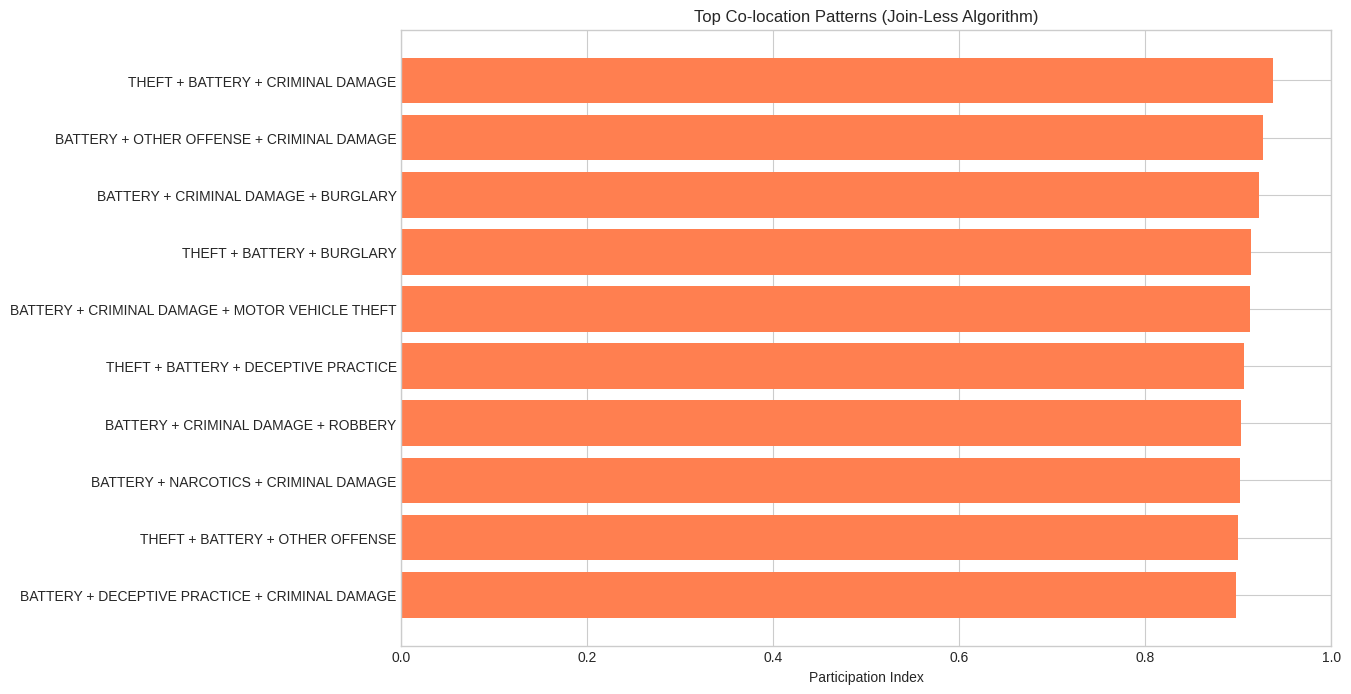

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
patterns = [' + '.join(p) for p, v in sorted_results[:10]]
scores = [v for p, v in sorted_results[:10]]
ax.barh(patterns, scores, color='coral')
ax.set_xlabel('Participation Index')
ax.set_title('Top Co-location Patterns (Join-Less Algorithm)')
ax.invert_yaxis()
ax.set_xlim(0.0, 1.0)
plt.show()

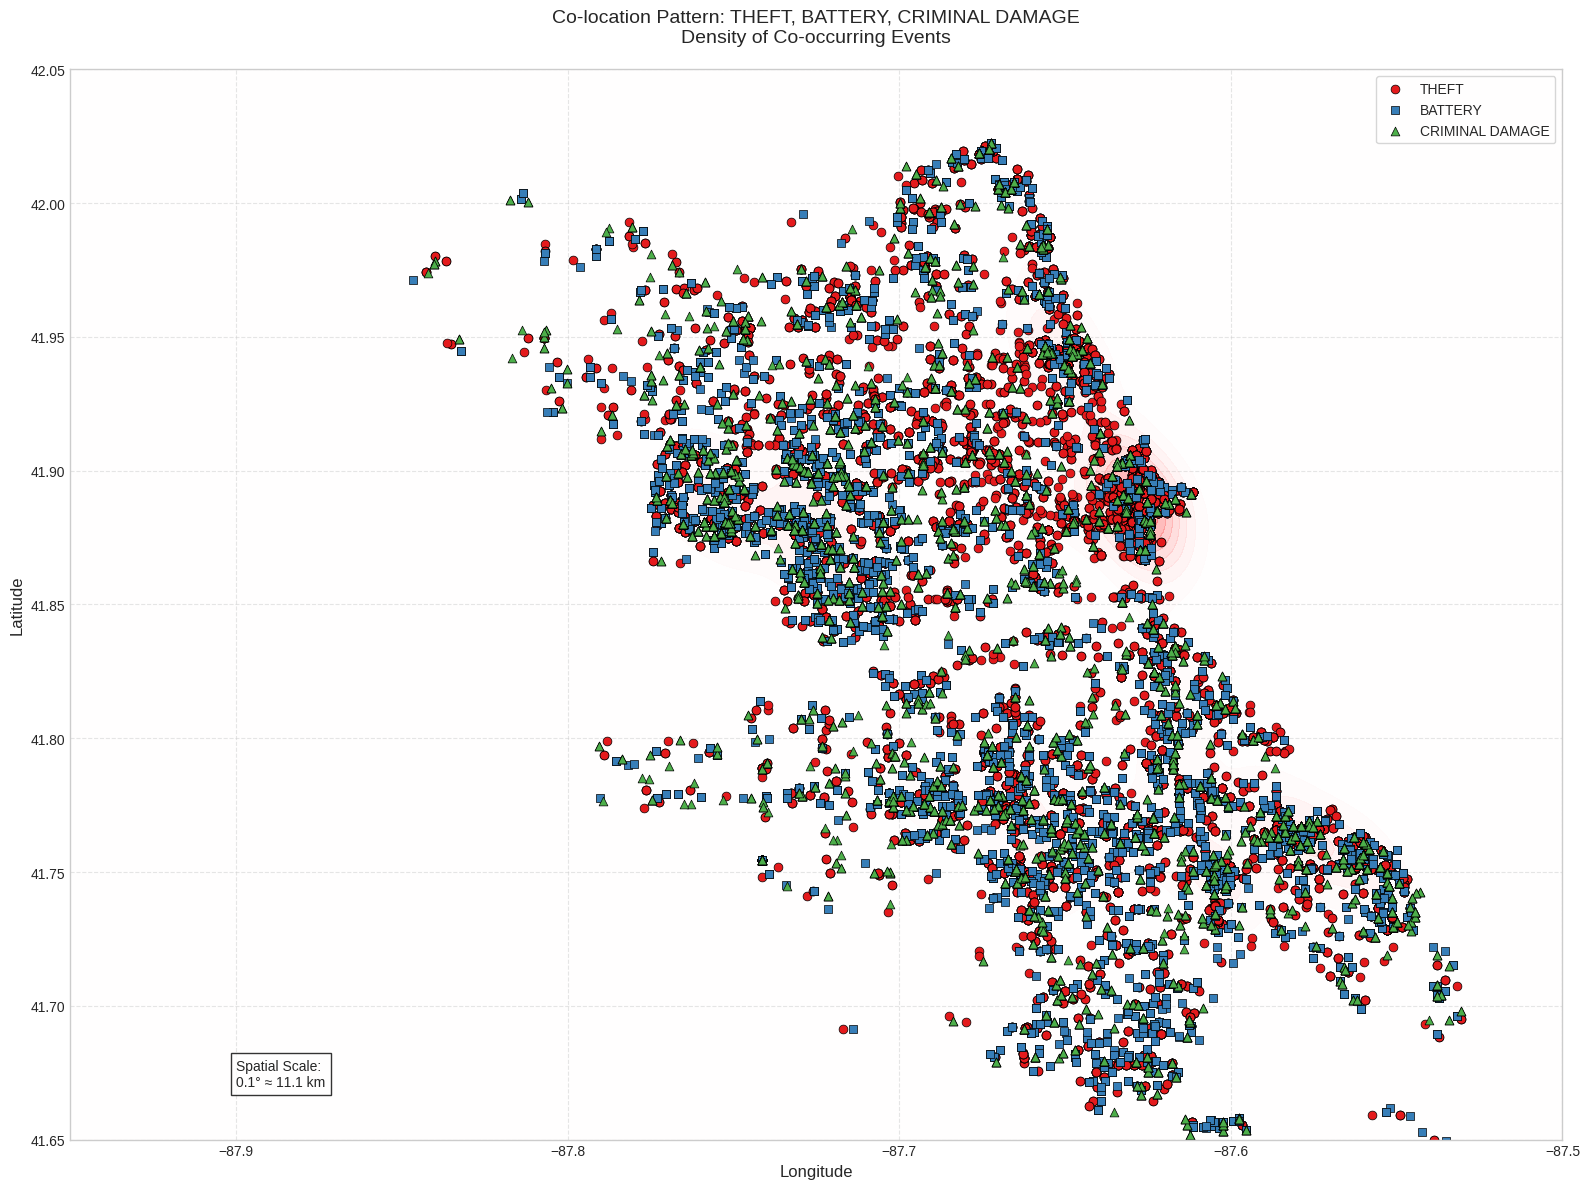

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

chi_bbox = (-87.95, -87.5, 41.65, 42.05)

def plot_colocations(df, top_pattern, star_neighborhoods):
    """Visualize co-location patterns with density estimation"""
    plt.figure(figsize=(16, 12))


    lons, lats = [], []
    crime_colors = {'THEFT': '#e41a1c', 'BATTERY': '#377eb8',
                   'CRIMINAL DAMAGE': '#4daf4a'}


    pattern_points = defaultdict(list)
    for center, neighbors in star_neighborhoods:
        center_type = df.iloc[center]['Primary Type']
        if center_type not in top_pattern:
            continue

        for nbr in neighbors:
            nbr_type = df.iloc[nbr]['Primary Type']
            if nbr_type in top_pattern and nbr_type != center_type:
                lons.extend([df.iloc[center]['Longitude'], df.iloc[nbr]['Longitude']])
                lats.extend([df.iloc[center]['Latitude'], df.iloc[nbr]['Latitude']])
                pattern_points[center_type].append((df.iloc[center]['Longitude'],
                                                  df.iloc[center]['Latitude']))
                pattern_points[nbr_type].append((df.iloc[nbr]['Longitude'],
                                               df.iloc[nbr]['Latitude']))


    if len(lons) > 10:
        kde = gaussian_kde(np.vstack([lons, lats]))
        xgrid = np.linspace(chi_bbox[0], chi_bbox[1], 200)
        ygrid = np.linspace(chi_bbox[2], chi_bbox[3], 200)
        X, Y = np.meshgrid(xgrid, ygrid)
        Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)


        cmap = LinearSegmentedColormap.from_list('density', ['#ffffff00', '#ff000080'])
        plt.contourf(X, Y, Z, cmap=cmap, levels=10, zorder=1)


    markers = {'THEFT': 'o', 'BATTERY': 's', 'CRIMINAL DAMAGE': '^'}
    for crime_type, points in pattern_points.items():
        if points:
            x, y = zip(*points)
            plt.scatter(x, y, c=crime_colors[crime_type],
                       marker=markers[crime_type], s=40,
                       edgecolor='k', linewidth=0.5,
                       label=crime_type, zorder=2)

    plt.xlim(chi_bbox[0], chi_bbox[1])
    plt.ylim(chi_bbox[2], chi_bbox[3])
    plt.title(f'Co-location Pattern: {", ".join(top_pattern)}\n'
             f"Density of Co-occurring Events", pad=20, fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)

    plt.text(-87.9, 41.67, 'Spatial Scale:\n0.1° ≈ 11.1 km',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.legend(loc='upper right', frameon=True,
              facecolor='white', framealpha=0.8)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

top_pattern = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']
plot_colocations(df_stratified, top_pattern, star_neighborhoods)